# Методическое пособие для выполнения зачетной работы по дисциплине "Математические библиотеки и пакеты"

Первый шаг выполнения работы - импорт библиотек. В данной работе нам понадобятся следующие библиотеки: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.contingency import expected_freq
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
%matplotlib inline

C:\Users\User\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Примечание: для упрощения и удобства мы вводим специальные обозначения библиотек, например, вместо pandas мы пишем pd и так далее.

# Вариант 7

## Выполните следующие задания:

Обработайте статистические данные 100 независимых измерений некоторой физической величины Х.

1) Составьте статистическое распределение частот выборки Х.

2) Найдите эмпирическую функцию распределения и постройте ее график.

3) Постройте полигон и гистограмму относительных частот.

4) Вычислите числовые характеристики:

• выборочную среднюю;

• выборочную дисперсию;

• выборочное среднее квадратическое отклонение;

• коэффициенты эксцесса и ассиметрии.

5) Выдвинув гипотезу о нормальном распределении, проверьте ее критерием согласия Пирсона при уровне значимости а = 0.05.

6) Найдите точечные и интервальные оценки параметров распределения (доверительную вероятность принять равной 0.95).

7) Сделать регрессионный анализ

8) Дисперсионный анализ

# Начало работы
Перед началом выполнения заданий нужно удостовериться, что файл читается правильно. 
Стоит отметить, что данные представлены в виде таблицы формата CSV, параметры отделяются друг от друга запятыми, это нужно для более удобного считывания информации.
Для этого воспользуемся функцией head(). С её помощью выведем первые 5 строк из таблицы данных.

In [3]:
data=pd.read_csv('data.csv')
data.head()

,X,Y
0,170,63
1,175,67
2,172,64
3,181,69
4,176,75


## Построим гистограмму распределения. 
Это нужно для общего представления о наших данных.
Для этого воспользуемся функцией hist с выборкой по параметру Х из таблицы. Вывод гистограммы осуществляется с помощью функции show().

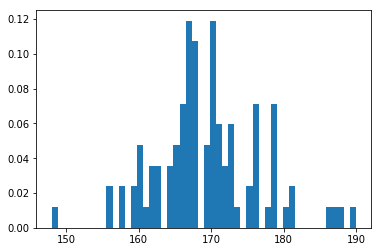

In [4]:
plt.hist(data['X'],50, normed='True')
plt.show()

# Статистическое распределение частот выборки

Для того, чтобы построить статистическое распределение частот выборки, необходимо сначала определить следующие параметры: 
## Максимальное значение:

In [5]:
X_max=max(data['X'])
print(X_max)

190


## Минимальное значение:

In [6]:
X_min=min(data['X'])
print(X_min)

148


## Разница между минимумом и максимумом:

In [7]:
R=X_max-X_min
print(R)

42


Теперь разобьем выборку на интервальные отрезки. Во многих источниках для определения “оптимального” числа интервалов можно найти упоминание эвристической формулы Старджесса: $$k=3,31*lgn+1$$ Воспользуемся данной формулой.
## Число интервалов:

In [8]:
K=float(round(1.0+3.32*np.log10(100)))
print(K)

8.0


Зная разницу наибольшего и наименьшего элемента выборки, а также число интервалов, мы можем найти шаг, с помощью которого задаются значения интервалов. Шаг находим по формуле: $$h=\frac{R}{k}$$
## Шаг:

In [9]:
H=float(R/K)
print(H)

5.25


Теперь, зная все нужные параметры, можно рассчитать частоты по интервалам.

In [10]:
def intervals_cumsum(x_min,step,size):
    start=x_min
    a=[]
    b=[]
    for i in range(size):
        a.append(start)
        start+=step
        b.append(start)
    return a,b

def count_values(data,element):
    count=0;counts=[]
    for item in data['X']:
        if item<=element:
            count+=1
    return count
   
def counter_in(data,b):
    delta=[];f=0
    for index in range(len(b)):
        first=count_values(data,b[index])-f
        delta.append(first)
        f+=first
    return delta
  
        
def frequences(ni,n):
    freq=[]
    for item in ni:
        freq.append(item/n)
    return freq
        
a,b=intervals_cumsum(X_min,H,int(K))
ni=counter_in(data,b)
freq=frequences(ni,100.0)
print('Частоты по интервалам:')
print(freq)

Частоты по интервалам:
[0.01, 0.04, 0.13, 0.36, 0.24, 0.15, 0.03, 0.04]


Чтобы проверить правильность рассчетов, можно вывести сумму посчитанных частот и убедиться, что сумма равна 1:

In [11]:
print('Сумма частот:')
print(round(sum(freq)))

Сумма частот:
1.0


# Построим полигон и гистограмму посчитанных частот
Чтобы построить полигон, воспользуемся функцией plot(). Зададим ось х отрезком от 0 до 25 с шагом 8:

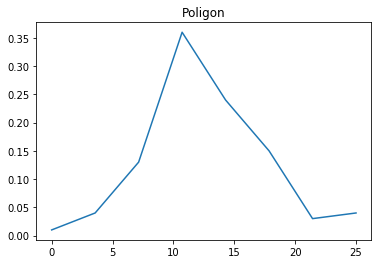

In [12]:
x=np.linspace(0,25,8)
plt.plot(x,freq)
plt.title('Poligon')
plt.show()

Построим гистограмму, используя функцию hist(), которой уже пользовались ранее:

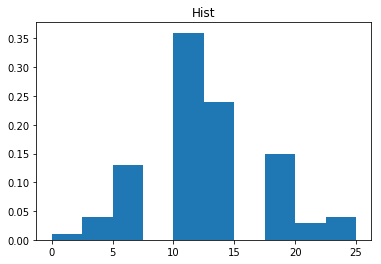

In [13]:
plt.hist(x,10,weights=freq)
plt.title('Hist')
plt.show()

# Эмпирическая функция распределения

С помощью модуля distributions библиотеки statsmodels построим график функции распределения. Начальное значение оси Х - минимальный элемент выборки, последнее значение - максимальный элемент. 

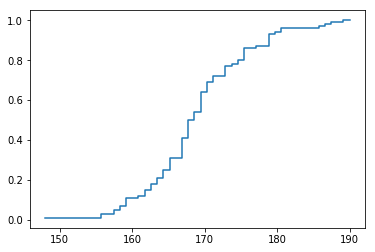

In [14]:
graph = sm.distributions.ECDF(data['X'])
x = np.linspace(min(data['X']), max(data['X']))
y = graph(x)
plt.step(x, y)
plt.show()

# Вычисление числовых характеристик

## Мода выборки
Мода выборки вычисляется с помощью модуля stats библиотеки scipy. В качестве входных данных используется столбец Х. 

Модой распределения называется такая величина изучаемого признака, которая в данной совокупности встречается наиболее часто, т.е. один из вариантов признака повторяется чаще, чем все другие.

In [15]:
print("Мода выборки:")

print(stats.mode(data['X']))

Мода выборки:
ModeResult(mode=array([167], dtype=int64), count=array([10]))


## Медиана
Медиана вычисляется с помощью функции median() библиотеки numpy. 

Медиана - это значение признака, приходящееся на середину ряда, расположенного в порядке возрастания или убывания числовых значений признака.

In [16]:
print("Медиана:")

print(np.median(data['X']))

Медиана:
168.5


## Среднее значение
Среднее значение вычисляется с помощью функции mean() библиотеки numpy. 

In [17]:
print("Среднее значение:")

print(np.mean(data['X']))

Среднее значение:
169.37


## Дисперсия
Дисперсия вычисляется с помощью функции var() библиотеки numpy.

Если матожидание отражает центр случайной величины, то дисперсия дает характеристику разброса данных вокруг центра. То есть дисперсия - это математическое ожидание отклонений от математического ожидания.

In [18]:
print("Дисперсия:")

print(np.var(data['X']))

Дисперсия:
51.2531


## Среднее квадратичное отклонение
Среднее квадратичное отклонение вычисляется с помощью функции std() библиотеки numpy. 

Среднеквадратичное отклонение, очевидно, также характеризует меру рассеяния данных, но теперь (в отличие от дисперсии) его можно сравнивать с исходными данными, так как единицы измерения у них одинаковые. 

In [19]:
print("Среднее квадратичное отклонение:")

print(np.std(data['X']))

Среднее квадратичное отклонение:
7.15912704176


## Коэффициент вариации
Среднее квадратическое отклонение дает абсолютную оценку меры разброса. Поэтому чтобы понять, насколько разброс велик относительно самих значений, требуется относительный показатель. Такой показатель называется коэффициентом вариации.

In [20]:
print("Коэффициент вариации:")

print(stats.variation(data['X']))

Коэффициент вариации:
0.042269156531592716


## Коэффициенты эксцесса и асимметрии
Коэффициенты эксцесса и асимметрии вычисляются с помощью функций модуля stats библиотеки scipy.


Коэффициент эксцесса $\gamma_1$ — мера остроты пика по сравнению с нормальным распределением: $\gamma_1=0$ в случае так называемого нормального эксцесса (в силу того, что у нормального распределения тоже $\gamma_1=0$), $\gamma_1<0$ в случае дефекта (т.н. отрицательный эксцесс, когда в окрестности моды более низкая и плоская вершина, чем у нормального распределения), $\gamma_1>0$ в случае эксцесса (т.н. положительный эксцесс, когда в окрестности моды более острый и высокий пик, чем у нормального распределения).

Коэффициент асимметрии $\gamma_2$ — мера асимметричности: $\gamma_2=0$ в случае симметричности распределения относительно мат.ожидания, $\gamma_2<0$ в случае левой асимметрии (отн. мат.ожидания левый хвост длиннее правого),  $\gamma_2>0$ в случае правой асимметрии (отн. мат.ожидания правый хвост длиннее левого).

In [21]:
print("\nКоэффициент эксцесса:")

print(stats.kurtosis(data['X']))

print("\nКоэффициент асимметрии:")

print(stats.skew(data['X']))


Коэффициент эксцесса:
0.7303676425

Коэффициент асимметрии:
0.312019187157


## Нормальность распределения
Выполним проверку на нормальность распределения с помощью критерия Колмогорова. Для проверки используем встроенную функцию kstest() модуля stats.

Классический критерий Колмогорова (иногда говорят Колмогорова-Смирнова) предназначен для проверки простых гипотез о принадлежности анализируемой выборки некоторому полностью известному закону распределения. Данный критерий похож на критерий Пирсона, только анализируется разность между функцией распределения предполагаемого распределения и имеющегося распределения данных измерений.

In [22]:
print("Нормальность распределения (Критерий Колмогорова):")

print(stats.kstest(data['X'], 'norm'))

Нормальность распределения (Критерий Колмогорова):
KstestResult(statistic=1.0, pvalue=0.0)


# Точечные и интервальные оценки параметров распределения

Оценки неизвестных параметров бывают двух видов – точечные и интервальные . 
Точечная оценка - оценка имеющая конкретное числовое значение. Например, среднее арифметическое: $$\frac{(x1+x2+...+xn)}{n}$$ где: x1,x2,...xn - выборочные значения; n - объем выборки.

Интервальная оценка - оценка представляемая интервалом значений, внутри которого с задаваемой исследователем вероятностью 1- α находится истинное значение оцениваемого параметра. Интервал в интервальной оценке называется доверительным интервалом, задаваемая исследователем вероятность, 1- α, называется доверительной вероятностью. В практике статистических вычислений применяются стандартные значения доверительной вероятности: 0,95, 0,98 и 0,99 (95%, 98% и 99% соответственно).

In [23]:
T_coef=1.98

def get_mean_intervals(a,b): ##получаем средние значения интервалов
    means=[]
    for i in range(len(a)):
        means.append((a[i]+b[i])/2)
    return means

def mean_mult_freq(means,freq): ##умножаем полученные значения на значения частов этих интервалов
    m=[]
    for i in range(len(means)):
        m.append(means[i]*freq[i])
    return m

def get_d(means): ##вычисляем сумму значений, полученных на предыдущем шаге, затем из каждого элемента вычитаем эту сумму
    data=[]
    for item in means:
        data.append(round(item-sum(mean_mult_freq(means,freq)),2))
    return data

def get_d2(d,freq): ##умножаем квадрат полученных значений на соответствующие им частоты
    data=[]
    for i in range(len(d)):
        data.append(round(d[i]**2*freq[i],2))
    return data

means=get_mean_intervals(a,b) 

d=get_d(means)
d=get_d2(d,freq)

S=np.sqrt(sum(d)*100/99) ##получаем несмещенное значение
yolo=T_coef*S/np.sqrt(len(data['X'])) ##вычисляем значение для разброса интервальной оценки
xmax=round(np.mean(data['X'])+yolo,2) ##рассчитываем нижнюю и верхнюю границу интервала
xmin=round(np.mean(data['X'])-yolo,2)

Интервальная оценка:

In [26]:
print(str(xmin)+' < a < '+str(xmax))

167.96 < a < 170.78


Воспользуемся критерием Пирсона для получения точечной оценки. Результатом выполнения функции pearsonr() модуля stats являются 2 числа, показывающие, насколько близко наше распределение к нормальному. 

In [27]:
coef_corr=stats.pearsonr(data['X'],data['Y'])
print(coef_corr)

(0.7034436809427989, 3.326402623365765e-16)


Если результат выполнения функции - (0, 0), это значит, что значения Х и Y - независимы. В нашем случае ситуация обратная, поэтому можно сделать вывод о зависимости параметров и нормальном распределении выборки.

# Регрессионный анализ

Для работы с регрессионным анализом воспользуемся модулем LinearRegression библиотеки sklearn. Функция fit() принимает значения таблицы по Х и У и возвращает саму себя:

In [28]:
lr=LinearRegression().fit(data[['X']], data[['Y']])

## Коэффициент линейной регрессии
Коэффициенты линейной регрессии показывают скорость изменения зависимой переменной по данному фактору, при фиксированных остальных факторах (в линейной модели эта скорость постоянна).

In [32]:
print(lr.coef_[0][0])

0.6889827151918618


## R-квадрат
Функция score()  возвращает коэффициент детерминации R-квадрат. Коэффициент детерминации принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50% (в этом случае коэффициент множественной корреляции превышает по модулю 70%). Модели с коэффициентом детерминации выше 80% можно признать достаточно хорошими.

In [33]:
print(lr.score(data[['X']], data[['Y']]))

0.494833012258354


## Множественный R
Множественный коэффициент корреляции R (множественное R) - это положительный квадратный корень из R-квадрата. Величина коэффициента корреляции отражает силы связи.

In [34]:
print(data.corr()['Y'][0])

0.7034436809427979


## Стандартная ошибка

In [35]:
print(np.std(data['X'], ddof=1)) 

7.19519340121


## Уравнение регрессии
Используя среднее значение выборки по X и Y, а также зная коэффициент линейной регресии, можно составить уравнение регрессии:

In [36]:
print('y='+str(lr.coef_[0][0])+'*'+'(x-'+str(np.mean(data['X']))+')'+'+'+str(np.mean(data['Y'])))

y=0.6889827151918618*(x-169.37)+64.75


Построим график составленной прямой. Синими точками обозначены входные данные и можно увидеть, что прямая идет как среднее значение этих данных.

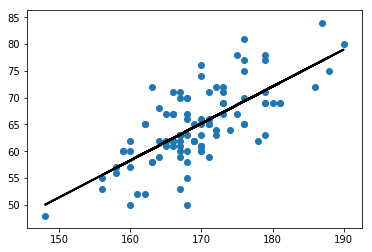

In [42]:
plt.plot(data[['X']], lr.predict(data[['X']]), color='black',linewidth=2)
plt.scatter(data['X'],data['Y'])
plt.show()

Данные подсчеты можно выполнить как вручную (как это сделано выше), используя функции модуля LinearRegression, а можно воспользоваться пакетом функций ols модуля statsmodels. Выполним с помощью данной функции дисперсионный анализ.

# Дисперсионный анализ
Откуда произошло название дисперсионный анализ? Может показаться странным, что процедура сравнения средних называется дисперсионным анализом. В действительности, это связано с тем, что при исследовании статистической значимости различия между средними двух (или нескольких) групп, мы на самом деле сравниваем (анализируем) выборочные дисперсии. 


Метод наименьших квадратов (англ. Ordinary Least Squares, OLS) — математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. Выполним метод наименьших квадратов, установив, что Х зависит от Y (Y~X). Заполняем таблицу.

In [43]:
cw_lm=ols('Y~X',data).fit()
sm.stats.anova_lm(cw_lm)

C:\Users\User\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\User\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\User\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,2432.970213,2432.970213,95.995258,3.326403e-16
Residual,98.0,2483.779787,25.344692,NaN,NaN


Используя различные методы оценок, выведем общую информацию.

In [44]:
cw_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     96.00
Date:                Sun, 13 May 2018   Prob (F-statistic):           3.33e-16
Time:                        14:38:38   Log-Likelihood:                -302.51
No. Observations:                 100   AIC:                             609.0
Df Residuals:                      98   BIC:                             614.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.9430     11.921     -4.357      0.000     -75.600     -28.286
X              0.6890      0.070      9.798      0.000       0.549       0.829
==============================================================================
Omnibus:                        0.546   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.502
Skew:                           0.168   Prob(JB):                        0.778
Kurtosis:                       2.915   Cond. No.                     4.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Функция summary() позволяет узнать множество показателей дисперсионного анализа. Среди них есть стандартная ошибка, t-статистика, сумма квадратов, средний квадрат и другие.

#### Одним из методов оценки является критерий Дарбина-Уотсона. 
Критерий Дарбина—Уотсона (или DW-критерий) — статистический критерий, используемый для тестирования автокорреляции первого порядка элементов исследуемой последовательности. Наиболее часто применяется при анализе временных рядов и остатков регрессионных моделей. Условный показатель, который применяется для выявления автокорреляции во временных рядах (обозначается d). Показатель d вычисляется по формуле: где yt+1 и yt — соответствующие уровни ряда. При отсутствии автокорреляции в исследуемом ряде показатель D.-W. приближается к числу 2, однако для правильного выбора необходимо учитывать, что в каждом конкретном случае величина d зависит от числа оцениваемых параметров и числа наблюдений. В нашем случае показатель равен 1.799.

В таблице приведены и другие показатели, такие как, например, Тест Харке—Бера (англ. Jarque-Bera test). Это статистический тест, проверяющий ошибки наблюдений на нормальность посредством сверки их третьего момента (асимметрия) и четвёртого момента (эксцесс) с моментами нормального распределения.

Примечание: можно заметить, что в таблице зануляется столбец P> |t|, чтобы узнать показатели, выведем отдельно этот столбец. 

In [45]:
stats.pearsonr(data['X'], data['Y']) 

(0.7034436809427989, 3.326402623365765e-16)

# Выводы

В данной работе показано множество возможностей языка Python для задач математической статистики. 

Следует отметить, что для исследования функций Python'а можно выбрать один из двух вариантов работы: воспользоваться готовыми пакетами задач, как, например, в пункте "Дисперсионный анализ", или глубже погрузиться в изучение материала и использовать отдельные библиотеки и модули для работы с данными. В нашем случае, оба варианта одинаково эффективны.

##### Дополнительный материал для изучения:


https://docs.python.org/3/library/statistics.html - официальная документация по пакету статистики.


http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html - документация по линейной регресии.


http://www.machinelearning.ru - здесь можно найти дополнительную информацию о регрессионном и дисперсионном анализе.